In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

import pandas as pd
import numpy as np
import glob
import codecs
import cv2

from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm

In [21]:
df = pd.DataFrame.from_csv("../results/demo_priority_2/set1.csv").reset_index()

/home/izza/installdir/miniconda3/envs/stock/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [29]:
df_301 = df[df["PCI"] == 301]
df_302 = df[df["PCI"] == 302]
df_unique_301 = df_301.groupby("location_x").max().reset_index()
df_unique_302 = df_302.groupby("location_y").max().reset_index()

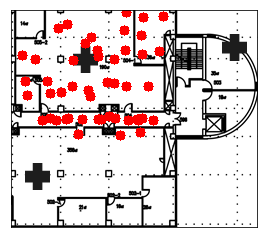

In [30]:
lon_list = df_302["location_x"]
lat_list = df_302["location_y"]
lon_list = [int(x) for x in lon_list]
lat_list = [int(x) for x in lat_list]

x_cut = 100 # 
y_cut = 680 # 

old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[x_cut:318, y_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
    
for lat, lon in zip(lat_list, lon_list) :
    new_backtorgb = cv2.circle(crop, (lon-y_cut, lat-x_cut), 5, (255, 0, 0), -1)

plt.imshow(crop, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [16]:
crop.shape

(218, 247, 3)

In [31]:
rsrp = [x for x in df_unique_301["RSRP"]]

In [32]:
x = df_unique_301["location_x"]
y = df_unique_301["location_y"]
# y = zip(*[(x, y) for x, y in df_unique_301.index])

In [33]:
>>> x = np.array(x)
>>> y = np.array(y)
>>> z = np.array(rsrp)

In [34]:
x.shape

(16,)

In [35]:
y.shape

(16,)

In [36]:
z.shape

(16,)

In [37]:
>>> ti = np.linspace(-2.0, 2.0, 250)
>>> XI, YI = np.meshgrid(ti, ti)

In [38]:
>>> # use RBF
>>> rbf = Rbf(x, y, z, epsilon=1)
>>> ZI = rbf(XI, YI)

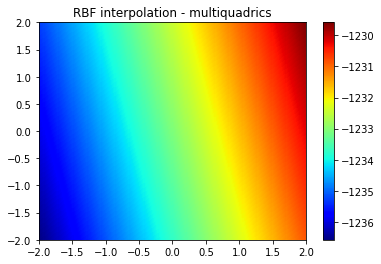

In [39]:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
>>> # plot the result
>>> plt.subplot(1, 1, 1)
>>> plt.pcolor(XI, YI, ZI, cmap=cm.jet)
# >>> plt.scatter(x, y, 20, z, cmap=cm.jet)
>>> plt.title('RBF interpolation - multiquadrics')
>>> plt.xlim(-2, 2)
>>> plt.ylim(-2, 2)
>>> plt.colorbar()

In [181]:
XI.shape

(250, 250)

In [182]:
YI.shape

(250, 250)

In [183]:
ZI.shape

(250, 250)